Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
Epoch 0 - loss: 312.0310363769531
Epoch 10 - loss: 5.688826560974121
Epoch 20 - loss: 5.6921844482421875
Epoch 30 - loss: 5.6921844482421875
Epoch 40 - loss: 5.6921844482421875
Epoch 50 - loss: 5.6921844482421875
Epoch 60 - loss: 5.6921844482421875
Epoch 70 - loss: 5.6921844482421875
Epoch 80 - loss: 5.6921844482421875
Epoch 90 - loss: 5.6921844482421875
Epoch 100 - loss: 5.6921844482421875
Epoch 110 - loss: 5.6921844482421875
Epoch 120 - loss: 5.6921844482421875
Epoch 130 - loss: 5.6921844482421875
Epoch 140 - loss: 5.6921844482421875
Epoch 150 - loss: 5.6921844482421875
Epoch 160 - loss: 5.6921844482421875
Epoch 170 - loss: 5.6921844482421875
Epoch 180 - loss: 5.6921844482421875
Epoch 190 - loss: 5.6921844482421875
Epoch 200 - loss: 5.6921844482421875
Epoch 210 - loss: 5.6921844482421875
Epoch 220 - loss: 5.6921844482421875
Epoch 230 - loss: 5.69218444824

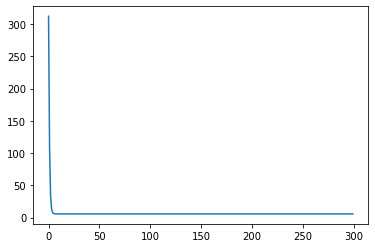

In [25]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

hist = []

############## Batch GD based update ##############       
      
for epoch in range(300):
    for i in range(len(data)):
        optimizer.zero_grad()
        outputs = net(data[i])
        #print(data[i],target[i])
        loss = criterion(outputs, target[i])
        loss.backward()
        #hist.append(loss.detach())
        optimizer.step()
    hist.append(loss.detach())
    if epoch % 10 == 0:
        print("Epoch {} - loss: {}".format(epoch, loss))
####################################################

### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}".format(current_data, out))
    
plt.plot(hist, label = "training curve")